In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib

%matplotlib inline

# 1. 시계열 데이터 타입  (datetime)

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2020, 7, 23, 9, 37, 48, 532333)

In [4]:
now.month

7

<img src="img/예제실습/datetime.jpg" alt="datetime" style="width: 1200px;"/>

## 1.1 timedelta 를 활용한 시간 계산

In [5]:
from datetime import timedelta

In [6]:
now + timedelta(days=15)
# weeks, days, hours, minutes, seconds, milliseconds, microseconds

datetime.datetime(2020, 8, 7, 9, 37, 48, 532333)

In [7]:
datetime.now() - now

datetime.timedelta(0, 0, 55587)

In [8]:
# 현재 시간보다 ~ 후의 시간을 계산
now + timedelta(weeks = 3, days = 20, hours = 3)

datetime.datetime(2020, 9, 2, 12, 37, 48, 532333)

In [9]:
first = datetime(year = 2020, month = 5, day = 10)
first + timedelta(days = 100)

datetime.datetime(2020, 8, 18, 0, 0)

In [10]:
target_day = datetime(year = 2020, month = 10, day = 30)
target_day - datetime.now()

datetime.timedelta(98, 51731, 372147)

## 1.2 편리한 색인

In [11]:
import random
sample = DataFrame()

In [12]:
sample['날짜'] = pd.date_range(start = '20200701', periods = 180).tolist()
sample['사용자수'] = random.sample(range(1, 1000), 180)
sample

,날짜,사용자수
0,2020-07-01,746
1,2020-07-02,742
2,2020-07-03,870
3,2020-07-04,737
4,2020-07-05,518
...,...,...
175,2020-12-23,943
176,2020-12-24,643
177,2020-12-25,361
178,2020-12-26,578


In [13]:
# 9월 달 데이터만 조회
sample[(sample.날짜 > '2020-09-01')  & (sample.날짜 <= '2020-09-30')]

,날짜,사용자수
63,2020-09-02,851
64,2020-09-03,128
65,2020-09-04,49
66,2020-09-05,428
67,2020-09-06,611
68,2020-09-07,370
69,2020-09-08,98
70,2020-09-09,734
71,2020-09-10,546
72,2020-09-11,355


In [14]:
# 두 번째 방법
sample[sample.날짜.isin(  pd.date_range(start = '20200901', end = '20200930')  )]

,날짜,사용자수
62,2020-09-01,113
63,2020-09-02,851
64,2020-09-03,128
65,2020-09-04,49
66,2020-09-05,428
67,2020-09-06,611
68,2020-09-07,370
69,2020-09-08,98
70,2020-09-09,734
71,2020-09-10,546


In [15]:
# 세 번째 방법: 날짜 컬럼을 row index로 변환 후 색인
sample2 = sample.set_index('날짜')
sample2['2020-09']

,사용자수
날짜,
2020-09-01,113
2020-09-02,851
2020-09-03,128
2020-09-04,49
2020-09-05,428
2020-09-06,611
2020-09-07,370
2020-09-08,98
2020-09-09,734


In [16]:
sample2['2020-8' : '2020-10']

,사용자수
날짜,
2020-08-01,433
2020-08-02,326
2020-08-03,207
2020-08-04,607
2020-08-05,543
...,...
2020-10-27,314
2020-10-28,740
2020-10-29,392


In [17]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      180 non-null    datetime64[ns]
 1   사용자수    180 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [18]:
sample2.info()
# DatetimeIndex

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2020-07-01 to 2020-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사용자수    180 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


## 1.3 함수 사용  1 - strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [19]:
now.strftime('%Y-%m-%d')

'2020-07-23'

## 1-3 함수 사용 2 - strptime()으로 문자열을 날짜 타입으로 변환하기

In [20]:
string = '2020/12/25'
type(string)

str

In [21]:
datetime.strptime(string, '%Y/%m/%d')

datetime.datetime(2020, 12, 25, 0, 0)

### (실습 #1) 아래 df에서 2019년 7월 데이터만 선택하기

In [104]:
df = DataFrame({'date':['20190701','20190702', '20190705', '20190710', '20190723', 
                        '20190724','20190728', '20190805', '20190810', '20190823'],
                'value':random.sample(range(1, 100), 10)
})
df

,date,value
0,20190701,66
1,20190702,55
2,20190705,48
3,20190710,15
4,20190723,13
5,20190724,11
6,20190728,14
7,20190805,18
8,20190810,42
9,20190823,44


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   value   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [106]:
# date 컬럼의 타입을 datetime 으로 변환
# 첫 번째 방법: to_datetime() 함수 이용
df['date2'] = pd.to_datetime(df['date'], format = '%Y%m%d')

In [107]:
# 두 번째 방법: astype() 함수 이용
df['date3'] = df.date.astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
 3   date3   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 448.0+ bytes


In [108]:
# 세 번째 방법: strptime() 함수 이용
df['date4'] = df.date.apply(  lambda X: datetime.strptime(X, '%Y%m%d')  )
# datetime.strptime(df['date'], '%Y%m%d')

In [109]:
Q1 = df.sort_values('date').set_index('date2')
Q1

,date,value,date3,date4
date2,,,,
2019-07-01,20190701,66,2019-07-01,2019-07-01
2019-07-02,20190702,55,2019-07-02,2019-07-02
2019-07-05,20190705,48,2019-07-05,2019-07-05
2019-07-10,20190710,15,2019-07-10,2019-07-10
2019-07-23,20190723,13,2019-07-23,2019-07-23
2019-07-24,20190724,11,2019-07-24,2019-07-24
2019-07-28,20190728,14,2019-07-28,2019-07-28
2019-08-05,20190805,18,2019-08-05,2019-08-05
2019-08-10,20190810,42,2019-08-10,2019-08-10


In [110]:
Q1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2019-07-01 to 2019-08-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date3   10 non-null     datetime64[ns]
 3   date4   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 400.0+ bytes


In [111]:
# 둘 다 가능
# Q1['2019-07']
Q1['2019/07']

,date,value,date3,date4
date2,,,,
2019-07-01,20190701,66,2019-07-01,2019-07-01
2019-07-02,20190702,55,2019-07-02,2019-07-02
2019-07-05,20190705,48,2019-07-05,2019-07-05
2019-07-10,20190710,15,2019-07-10,2019-07-10
2019-07-23,20190723,13,2019-07-23,2019-07-23
2019-07-24,20190724,11,2019-07-24,2019-07-24
2019-07-28,20190728,14,2019-07-28,2019-07-28


## Tip. Week와 요일 정보 얻기(strftime)

In [112]:
# 심화 - Week(주차)와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

In [113]:
now = datetime.now()

In [114]:
now.strftime('%V')

'30'

In [115]:
now.strftime('%A')

'Thursday'

### (실습 #2) df에  week number(%V), weekday(%w) 컬럼 추가

In [116]:
df.drop(['date','date3','date4'], axis=1, inplace = True)

In [117]:
df = df[['date2', 'value']]
df.columns = ['date', 'value']
df

,date,value
0,2019-07-01,66
1,2019-07-02,55
2,2019-07-05,48
3,2019-07-10,15
4,2019-07-23,13
5,2019-07-24,11
6,2019-07-28,14
7,2019-08-05,18
8,2019-08-10,42
9,2019-08-23,44


In [118]:
df = df.sort_values('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 240.0 bytes


In [119]:
df['week'] = df['date'].applymap(lambda x: x.strftime('%V'))

AttributeError: 'Series' object has no attribute 'applymap'

In [120]:
df['date'][0].strftime('%V')

'27'

In [126]:
df['weekDay'] = df.date.apply(lambda X: X.strftime('%w') )
df['weekNum'] = df.date.apply(lambda X: X.strftime('%V') )
df

,date,value,weekDay,weekNum
0,2019-07-01,66,1,27
1,2019-07-02,55,2,27
2,2019-07-05,48,5,27
3,2019-07-10,15,3,28
4,2019-07-23,13,2,30
5,2019-07-24,11,3,30
6,2019-07-28,14,0,30
7,2019-08-05,18,1,32
8,2019-08-10,42,6,32
9,2019-08-23,44,5,34


### (실습 #3-1) 주차별 value 컬럼의 합 구하기


In [127]:
df.pivot_table(  index = 'weekNum', values = 'value', aggfunc = 'sum'  )

,value
weekNum,
27,169
28,15
30,38
32,60
34,44


### (실습 #3-2) 요일별 value 컬럼의 합 구하기

In [128]:
df.pivot_table(  index = 'weekDay', values = 'value', aggfunc = 'sum'  )

,value
weekDay,
0,14
1,84
2,68
3,26
5,92
6,42


## 2. 푸드코트 주문 데이터 분석

In [129]:
# 데이터 읽기
식당 = pd.read_excel('data/food_order.xlsx')

In [142]:
# 'date' 컬럼을 index label로 지정
dat = 식당.set_index('date')
dat.head()

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2013-08-06,dinner,grill & fry,훈제연어벤또(200개),F,213,0,0,0,0,0,-213,2013,8,6,1
2013-08-06,dinner,rice & soup 1,뚝배기 우거지 갈비탕,F,261,0,0,0,0,0,-261,2013,8,6,1
2013-08-06,lunch,noodle bar,판모밀정식,F,267,0,0,0,0,0,-267,2013,8,6,1
2013-08-06,breakfast,rice & soup 1,설렁탕정식,F,1,0,0,0,0,0,-1,2013,8,6,1
2013-08-06,lunch,rice & soup 1,A. 부대찌개정식,F,376,0,0,0,0,0,-376,2013,8,6,1


In [140]:
# 데이터 탐색 - 수집 기간
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6825 entries, 2013-08-06 to 2015-07-27
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dine_type      6825 non-null   object
 1   corner         6825 non-null   object
 2   menu           6825 non-null   object
 3   is_sold_out    6825 non-null   object
 4   use_count      6825 non-null   int64 
 5   pred_count     6825 non-null   int64 
 6   additional     6825 non-null   int64 
 7   good           6825 non-null   int64 
 8   ok             6825 non-null   int64 
 9   bad            6825 non-null   int64 
 10  diff_use_pred  6825 non-null   int64 
 11  year           6825 non-null   int64 
 12  month          6825 non-null   int64 
 13  day            6825 non-null   int64 
 14  wday           6825 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 853.1+ KB


In [145]:
dat.index.min(), dat.index.max()

(Timestamp('2013-08-06 00:00:00'), Timestamp('2015-07-27 00:00:00'))

In [150]:
# 요일별로 데이터가 균질하게 수집되고 있는지 확인
dat.wday.value_counts()

0    1433
1    1432
2    1373
3    1298
4    1289
Name: wday, dtype: int64

In [153]:
# 데이터 탐색 - 수집 기간 동안 누락 없이 데이터가 수집되었는지 확인

# 1. 수집 기간 동안의 주중 날짜 목록 만들기
businessDays = pd.date_range(start = dat.index.min(), end = dat.index.max(), freq='b')

In [154]:
len(businessDays)

515

In [157]:
len(dat.index.unique())
# 위와의 차이인 35일은 수집 안 된 것임.

480

In [161]:
businessDays[  businessDays.isin(dat.index.unique())  ]
# 수집 안 된 대부분의 날이 공휴일임을 확인

DatetimeIndex(['2013-08-06', '2013-08-12', '2013-08-13', '2013-08-14',
               '2013-08-19', '2013-08-20', '2013-08-21', '2013-08-22',
               '2013-08-23', '2013-08-26',
               ...
               '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
               '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23',
               '2015-07-24', '2015-07-27'],
              dtype='datetime64[ns]', length=480, freq=None)

In [ ]:
# 데이터 탐색 - corner 별 수집횟수 확인
dat.pivot_table(  index = 'corner', value = 'pred_count'  )

In [162]:
dat.corner.value_counts()

rice & soup 1    1422
take out         1381
after school      929
grill & fry       925
noodle bar        923
burger&pizza      913
rice & soup 2     332
Name: corner, dtype: int64

#### (실습 #4) 날짜 색인
- 1) 2014년 데이터만 선택하여 출력
- 2) 2015년 1월 데이터만 선택하여 출력
- 3) 2014년 8월 1일부터 2014년 9월 25일까지 데이터만 출력
- 4) 2015년 6월 30일 데이터만 출력

In [146]:
dat['2014']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2014-01-02,breakfast,take out,쿡살라미샌드위치,F,51,0,0,0,0,0,-51,2014,1,2,3
2014-01-02,dinner,noodle bar,오징어비빔국수,F,111,0,0,0,0,0,-111,2014,1,2,3
2014-01-02,dinner,take out,날치알캘리포니아롤,F,386,0,0,0,0,0,-386,2014,1,2,3
2014-01-02,lunch,burger&pizza,갈릭오일파스타,T,142,0,0,0,0,0,-142,2014,1,2,3
2014-01-02,dinner,burger&pizza,참치김치그라탕,T,151,0,0,0,0,0,-151,2014,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,lunch,noodle bar,짬뽕&탕수육,F,152,160,60,0,0,0,68,2014,12,31,2
2014-12-31,lunch,take out,연어레몬샐러드,F,124,170,0,0,0,0,46,2014,12,31,2
2014-12-31,dinner,after school,얼큰김치라면&계란말이,F,2,80,30,0,0,0,108,2014,12,31,2


In [147]:
dat['2015-1']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2015-01-02,dinner,after school,참깨라면&볶음김치김밥,F,39,80,10,0,0,0,51,2015,1,2,4
2015-01-02,lunch,after school,오징어김치볶음밥&계란후라이,F,158,170,40,0,0,0,52,2015,1,2,4
2015-01-02,breakfast,rice & soup 1,감자호박국&소고기야채볶음,F,35,20,10,0,0,0,-5,2015,1,2,4
2015-01-02,lunch,rice & soup 1,청국장찌개&돼지고기고추장볶음,F,235,380,50,0,0,0,195,2015,1,2,4
2015-01-02,lunch,noodle bar,자장면&김치만두찜,F,218,230,40,0,0,0,52,2015,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-30,dinner,burger&pizza,퀘사디아&카레볶음밥,F,36,70,10,0,0,0,44,2015,1,30,4
2015-01-30,dinner,grill & fry,추억의도시락비빔밥,F,139,120,30,0,0,0,11,2015,1,30,4
2015-01-30,breakfast,take out,샌드위치콤보&음료&과일,F,45,38,20,0,0,0,13,2015,1,30,4


In [163]:
dat.sort_index()['2014-8-1' : '2014-9-25']
# slicing

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2014-08-01,dinner,after school,햄모듬라면&콩도너츠,F,137,0,0,0,0,0,-137,2014,8,1,4
2014-08-01,lunch,after school,카레라면&비빔채소만두,T,129,0,0,0,0,0,-129,2014,8,1,4
2014-08-01,dinner,grill & fry,취나물밥&양념장,F,68,0,0,0,0,0,-68,2014,8,1,4
2014-08-01,breakfast,take out,7곡빵샌드위치,F,39,0,0,0,0,0,-39,2014,8,1,4
2014-08-01,lunch,grill & fry,더덕비빔밥,F,158,0,0,0,0,0,-158,2014,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-25,lunch,rice & soup 2,돼지고기고추장깻잎볶음,F,246,330,40,0,0,0,124,2014,9,25,3
2014-09-25,lunch,grill & fry,왕새우&카레라이스,F,321,350,50,0,0,0,79,2014,9,25,3
2014-09-25,dinner,grill & fry,황해도식해주비빔밥,F,87,140,15,0,0,0,68,2014,9,25,3


In [164]:
dat.loc['2015/06/30']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2015-06-30,dinner,take out,비엔나소시지컵밥,F,116,110,10,0,0,0,4,2015,6,30,1
2015-06-30,lunch,take out,콥샐러드,F,281,300,0,3,0,0,19,2015,6,30,1
2015-06-30,lunch,rice & soup 1,감자탕,F,230,250,10,63,46,30,30,2015,6,30,1
2015-06-30,lunch,after school,짜파게티,F,147,190,0,85,21,2,43,2015,6,30,1
2015-06-30,lunch,burger&pizza,콤비네이션피자,F,93,140,0,44,15,3,47,2015,6,30,1
2015-06-30,dinner,grill & fry,불고기채소비빔밥,F,145,200,0,31,11,2,55,2015,6,30,1
2015-06-30,breakfast,take out,샌드위치콤보&음료&과일,F,60,40,10,0,1,0,-10,2015,6,30,1
2015-06-30,dinner,after school,햄모둠라면,T,113,100,10,20,16,3,-3,2015,6,30,1
2015-06-30,dinner,burger&pizza,왕소시지김치그라탕,F,82,110,10,14,12,2,38,2015,6,30,1


### date_range()를 활용한 고급 기법
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

In [171]:
# 특정 기간의 날짜 생성
pd.date_range(start = '2020/01/01', end = '2020/02/15')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15'],
              dtype='datetime64[ns]', freq='D')

In [172]:
# start 날짜를 기준으로 periods 갯수만큼 날짜 생성
pd.date_range(start = '2020/01/01', periods = 10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#특정 주기로 날짜를 생성 - freq 인자
# 상세 내용은 https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 확인



# D: 일단위
# W: 주 단위 (일요일만 선택)
# W-MON: 주 단위이되, 월요일만 선택
# W-TUE: 주 단위이되, 화요일만 선택. WED, THU, FRI, SAT, SUN 모두 가능
# M: 매달 마지막날만 선택
# MS: 매달 첫째날만 선택
# B: 주중만 선택 (Business day)

#### (실습 #5 - date_range()) 식당 데이터 중 월요일 데이터만 선택하여 출력

In [174]:
dat[dat.wday == 0]

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2013-08-12,dinner,noodle bar,차슈라멘,F,179,0,0,0,0,0,-179,2013,8,12,0
2013-08-12,breakfast,rice & soup 1,뚝배기순대국,F,26,0,0,0,0,0,-26,2013,8,12,0
2013-08-12,lunch,rice & soup 1,A:누룽지장각백숙,F,504,0,0,0,0,0,-504,2013,8,12,0
2013-08-12,lunch,noodle bar,유니자장면,F,167,0,0,0,0,0,-167,2013,8,12,0
2013-08-12,dinner,rice & soup 1,김치날치알밥,F,216,0,0,0,0,0,-216,2013,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,lunch,grill & fry,돼지고기채소비빔밥,F,268,0,0,0,0,0,-268,2015,7,27,0
2015-07-27,lunch,rice & soup 2,생오리고추장불고기&부추생채,F,264,0,0,0,0,0,-264,2015,7,27,0
2015-07-27,breakfast,take out,샌드위치콤보&음료&과일,F,58,0,0,0,0,0,-58,2015,7,27,0


In [175]:
# 1) 매주 월요일 날짜만 생성
mon = pd.date_range(start = dat.index.min(), end=dat.index.max(),
             freq = 'w-MON')

In [177]:
dat[  dat.index.isin(mon)  ]

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2013-08-12,dinner,noodle bar,차슈라멘,F,179,0,0,0,0,0,-179,2013,8,12,0
2013-08-12,breakfast,rice & soup 1,뚝배기순대국,F,26,0,0,0,0,0,-26,2013,8,12,0
2013-08-12,lunch,rice & soup 1,A:누룽지장각백숙,F,504,0,0,0,0,0,-504,2013,8,12,0
2013-08-12,lunch,noodle bar,유니자장면,F,167,0,0,0,0,0,-167,2013,8,12,0
2013-08-12,dinner,rice & soup 1,김치날치알밥,F,216,0,0,0,0,0,-216,2013,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,lunch,grill & fry,돼지고기채소비빔밥,F,268,0,0,0,0,0,-268,2015,7,27,0
2015-07-27,lunch,rice & soup 2,생오리고추장불고기&부추생채,F,264,0,0,0,0,0,-264,2015,7,27,0
2015-07-27,breakfast,take out,샌드위치콤보&음료&과일,F,58,0,0,0,0,0,-58,2015,7,27,0


## (실습 #6) 푸드코트 데이터 분석
- 1) 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기
- 2) 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기
- 3) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기
- 4) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력
- 5) 2014년도에 가장 많이 팔린 상위 10개 메뉴 구하기
- 6) 5)에서 구한 상위 10개 메뉴에 대한 월별 판매 추이 그래프 그리기 (하루 평균 판매량)
- 7) 5)에서 구한 상위 10개 메뉴에 대한 분기별 판매 추이 그래프 그리기 (하루 평균 판매량)

### 6-1) 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기

In [182]:
# 가장 많은 판매량 = 날짜별로 use_count의 sum을 구한 후, sum값이 가장 큰 날짜 찾기
dat.pivot_table(index = 'date', values = 'use_count', aggfunc = 'sum')\
    .sort_values(by = 'use_count', ascending = False)[:1]
# [0]은 오류나는데 [:1]은 되네..

,use_count
date,
2013-10-23,4267


### 6-2) 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기

In [186]:
식사별메뉴판매량 = dat.pivot_table(index = 'menu', columns = 'dine_type', values = 'use_count', aggfunc = 'sum')

In [189]:
e21 = 식사별메뉴판매량.sort_values(by = 'breakfast', ascending = False).head(1)
e22 = 식사별메뉴판매량.sort_values(by = 'lunch', ascending = False).head(1)
e23 = 식사별메뉴판매량.sort_values(by = 'dinner', ascending = False).head(1)
print(e21.index, e22.index, e23.index)

Index(['샌드위치콤보&음료&과일'], dtype='object', name='menu') Index(['콥샐러드'], dtype='object', name='menu') Index(['로제컵파스타&새우튀김'], dtype='object', name='menu')


### 6-3) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기 

In [194]:
Q63 = dat['2014'].pivot_table(index = 'month', columns = 'corner', values='use_count')
Q63

corner,after school,burger&pizza,grill & fry,noodle bar,rice & soup 1,rice & soup 2,take out
month,,,,,,,
1,174.333333,142.282051,222.400000,199.625000,317.116667,NaN,249.383333
2,172.589744,140.948718,220.282051,190.692308,279.155172,199.500000,254.368421
3,170.952381,153.500000,221.809524,181.476190,203.682540,257.400000,252.161290
4,166.487805,146.309524,224.829268,174.609756,190.919355,229.523810,243.714286
5,145.000000,125.138889,231.027778,183.722222,182.907407,259.166667,236.508772
6,149.694444,136.055556,241.222222,178.210526,193.789474,258.277778,232.684211
7,148.933333,160.622222,239.304348,205.644444,199.898551,275.090909,229.217391
8,129.025000,160.900000,218.500000,180.725000,197.000000,268.400000,185.416667
9,112.526316,158.243243,205.405405,151.342105,161.964912,224.842105,114.736842


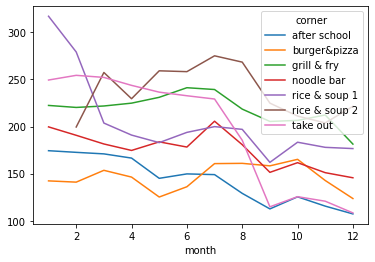

In [195]:
Q63.plot()

### 6-4) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력

In [219]:
Q64 = dat[dat.is_sold_out == 'T'].pivot_table(index = 'menu', aggfunc = 'count')['day'].sort_values(ascending=False)
pd.DataFrame(Q64)[:10]

,day
menu,
치즈돈가스,14
등심돈가스,13
김치볶음밥&계란후라이,11
고구마돈가스,9
고르곤졸라피자,9
양식돈가스,8
치즈버거,7
카레라이스,7
간자장면,6


### 6-5) 2014년도에 가장 많이 팔린 상위 10개 메뉴 구하기

In [220]:
Q65 = dat['2014'].pivot_table(index = 'menu', values='use_count', aggfunc = 'sum').sort_values('use_count', ascending=False)[:10]
Q65

,use_count
menu,
돈가스샐러드,7949
로제컵파스타&새우튀김,7560
훈제오리&단호박샐러드,7448
콥샐러드,7317
참치김치찌개,5783
토마토미트볼컵파스타,5391
등심돈가스,5007
미트볼라이스,4950
돈안심샐러드,4113


### 6-6) 5)에서 구한 상위 10개 메뉴에 대한 월별 판매 추이 그래프 그리기 (하루 평균 판매량)

In [224]:
menubymonth = dat['2014'].pivot_table(index = 'menu', columns='month', values='use_count', aggfunc = 'sum', fill_value=0)
menubymonth

month,1,2,3,4,5,6,7,8,9,10,11,12
menu,,,,,,,,,,,,
7곡빵샌드위치,0,0,0,0,0,0,158,62,0,0,0,0
<브런치스페셜>,0,0,0,0,0,0,0,0,0,136,0,0
BBQ비프피자,180,0,148,0,0,0,0,0,0,0,0,0
Hot!아라비아따스파게티,157,0,0,0,0,0,0,0,0,0,0,0
NC모닝,397,365,69,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
흑미밥&돼지갈비찜,0,0,0,0,0,0,0,0,0,0,0,66
흑미밥&쇠고기청경채굴소스볶음,0,0,0,0,0,0,0,0,0,0,0,31
흑미밥&콩나물국,0,0,0,0,0,0,0,0,0,0,44,0


In [231]:
topten = menubymonth[menubymonth.index.isin(Q65.index)]
topten

month,1,2,3,4,5,6,7,8,9,10,11,12
menu,,,,,,,,,,,,
돈가스샐러드,283,277,567,285,281,572,1008,920,751,1138,1073,794
돈안심샐러드,0,282,274,590,248,270,1146,1115,188,0,0,0
등심돈가스,316,0,271,455,0,484,826,545,837,548,334,391
로제컵파스타&새우튀김,0,0,0,1261,1347,1675,2100,1177,0,0,0,0
미트볼라이스,491,0,892,395,817,1593,445,317,0,0,0,0
불고기채소비빔밥,0,0,266,488,581,305,664,284,464,532,166,243
참치김치찌개,1271,1565,1465,0,43,445,808,28,0,0,158,0
콥샐러드,557,0,0,0,0,706,1028,837,787,1120,1285,997
토마토미트볼컵파스타,0,0,0,843,1312,1247,1989,0,0,0,0,0


In [246]:
topten[[1,3,5,7,8,10,12]] = topten[[1,3,5,7,8,10,12]]/31
topten[[4,6,9,11]] = topten[[4,6,9,11]]/30
topten[[2]] = topten[[2]]/28

In [255]:
Q66 = topten
Q66

month,1,2,3,4,5,6,7,8,9,10,11,12
menu,,,,,,,,,,,,
돈가스샐러드,0.294485,9.892857,0.590010,9.500000,0.292404,19.066667,1.048907,0.957336,25.033333,1.184183,35.766667,0.826223
돈안심샐러드,0.000000,10.071429,0.285120,19.666667,0.258065,9.000000,1.192508,1.160250,6.266667,0.000000,0.000000,0.000000
등심돈가스,0.328824,0.000000,0.281998,15.166667,0.000000,16.133333,0.859521,0.567118,27.900000,0.570239,11.133333,0.406868
로제컵파스타&새우튀김,0.000000,0.000000,0.000000,42.033333,1.401665,55.833333,2.185224,1.224766,0.000000,0.000000,0.000000,0.000000
미트볼라이스,0.510926,0.000000,0.928200,13.166667,0.850156,53.100000,0.463059,0.329865,0.000000,0.000000,0.000000,0.000000
불고기채소비빔밥,0.000000,0.000000,0.276795,16.266667,0.604579,10.166667,0.690947,0.295525,15.466667,0.553590,5.533333,0.252862
참치김치찌개,1.322581,55.892857,1.524454,0.000000,0.044745,14.833333,0.840791,0.029136,0.000000,0.000000,5.266667,0.000000
콥샐러드,0.579605,0.000000,0.000000,0.000000,0.000000,23.533333,1.069719,0.870968,26.233333,1.165453,42.833333,1.037461
토마토미트볼컵파스타,0.000000,0.000000,0.000000,28.100000,1.365245,41.566667,2.069719,0.000000,0.000000,0.000000,0.000000,0.000000


In [244]:
dat['2014-2'].index.unique()

DatetimeIndex(['2014-02-03', '2014-02-04', '2014-02-05', '2014-02-06',
               '2014-02-07', '2014-02-10', '2014-02-11', '2014-02-12',
               '2014-02-13', '2014-02-14', '2014-02-17', '2014-02-18',
               '2014-02-19', '2014-02-20', '2014-02-21', '2014-02-24',
               '2014-02-25', '2014-02-26', '2014-02-27', '2014-02-28'],
              dtype='datetime64[ns]', name='date', freq=None)

C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.

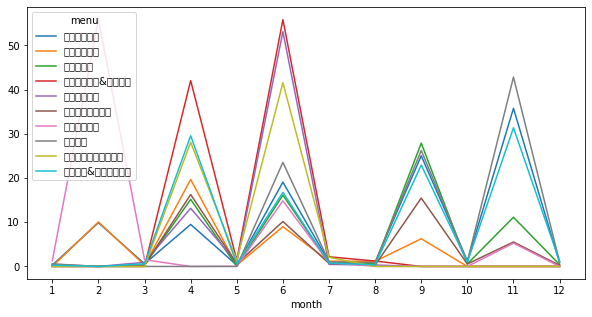

In [253]:
Q66.T.plot(figsize=(10,5), xticks=range(1,13))

### 6-7) 5)에서 구한 상위 10개 메뉴에 대한 분기별 판매 추이 그래프 그리기 (하루 평균 판매량)

In [256]:
Q66

month,1,2,3,4,5,6,7,8,9,10,11,12
menu,,,,,,,,,,,,
돈가스샐러드,0.294485,9.892857,0.590010,9.500000,0.292404,19.066667,1.048907,0.957336,25.033333,1.184183,35.766667,0.826223
돈안심샐러드,0.000000,10.071429,0.285120,19.666667,0.258065,9.000000,1.192508,1.160250,6.266667,0.000000,0.000000,0.000000
등심돈가스,0.328824,0.000000,0.281998,15.166667,0.000000,16.133333,0.859521,0.567118,27.900000,0.570239,11.133333,0.406868
로제컵파스타&새우튀김,0.000000,0.000000,0.000000,42.033333,1.401665,55.833333,2.185224,1.224766,0.000000,0.000000,0.000000,0.000000
미트볼라이스,0.510926,0.000000,0.928200,13.166667,0.850156,53.100000,0.463059,0.329865,0.000000,0.000000,0.000000,0.000000
불고기채소비빔밥,0.000000,0.000000,0.276795,16.266667,0.604579,10.166667,0.690947,0.295525,15.466667,0.553590,5.533333,0.252862
참치김치찌개,1.322581,55.892857,1.524454,0.000000,0.044745,14.833333,0.840791,0.029136,0.000000,0.000000,5.266667,0.000000
콥샐러드,0.579605,0.000000,0.000000,0.000000,0.000000,23.533333,1.069719,0.870968,26.233333,1.165453,42.833333,1.037461
토마토미트볼컵파스타,0.000000,0.000000,0.000000,28.100000,1.365245,41.566667,2.069719,0.000000,0.000000,0.000000,0.000000,0.000000


In [272]:
Q67 = pd.DataFrame()

Q67['q1'] = Q66[[1,2,3]].sum(axis=1)
Q67['q2'] = Q66[[4,5,6]].sum(axis=1)
Q67['q3'] = Q66[[7,8,9]].sum(axis=1)
Q67['q4'] = Q66[[10,11,12]].sum(axis=1)

Q67

,q1,q2,q3,q4
menu,,,,
돈가스샐러드,10.777352,28.859070,27.039577,37.777072
돈안심샐러드,10.356548,28.924731,8.619424,0.000000
등심돈가스,0.610822,31.300000,29.326639,12.110441
로제컵파스타&새우튀김,0.000000,99.268332,3.409990,0.000000
미트볼라이스,1.439126,67.116823,0.792924,0.000000
불고기채소비빔밥,0.276795,27.037912,16.453139,6.339785
참치김치찌개,58.739891,14.878078,0.869927,5.266667
콥샐러드,0.579605,23.533333,28.174020,45.036247
토마토미트볼컵파스타,0.000000,71.031911,2.069719,0.000000


C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.

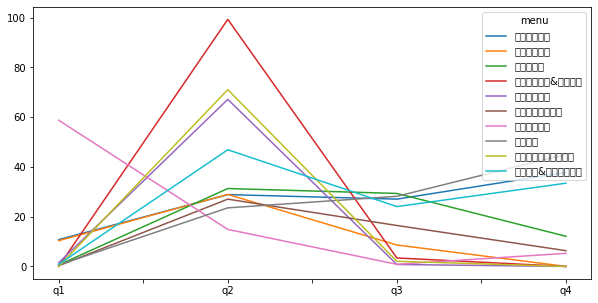

In [275]:
Q67.T.plot(figsize=(10,5))

## Prac Ans
6-3 ~

### 6-3) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기 

### 6-4) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력

### 6-5) 2014년도에 가장 많이 팔린 상위 10개 메뉴 구하기

### 6-6) 5)에서 구한 상위 10개 메뉴에 대한 월별 판매 추이 그래프 그리기 (하루 평균 판매량)

### 6-7) 5)에서 구한 상위 10개 메뉴에 대한 분기별 판매 추이 그래프 그리기 (하루 평균 판매량)